<a href="https://colab.research.google.com/github/saivardhan4f0/AI/blob/main/Copy_of_Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
from ipywidgets import interact
import matplotlib.pyplot as plt
import time

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Google Collab csv.')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print('Shape of Dataset : ',data.shape)

Shape of Dataset :  (2200, 8)


In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data['label'].value_counts()

chickpea       100
mothbeans      100
coconut        100
mango          100
apple          100
orange         100
coffee         100
mungbean       100
rice           100
pomegranate    100
banana         100
lentil         100
pigeonpeas     100
watermelon     100
maize          100
muskmelon      100
jute           100
grapes         100
blackgram      100
kidneybeans    100
cotton         100
papaya         100
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 0, 'Rainfall')

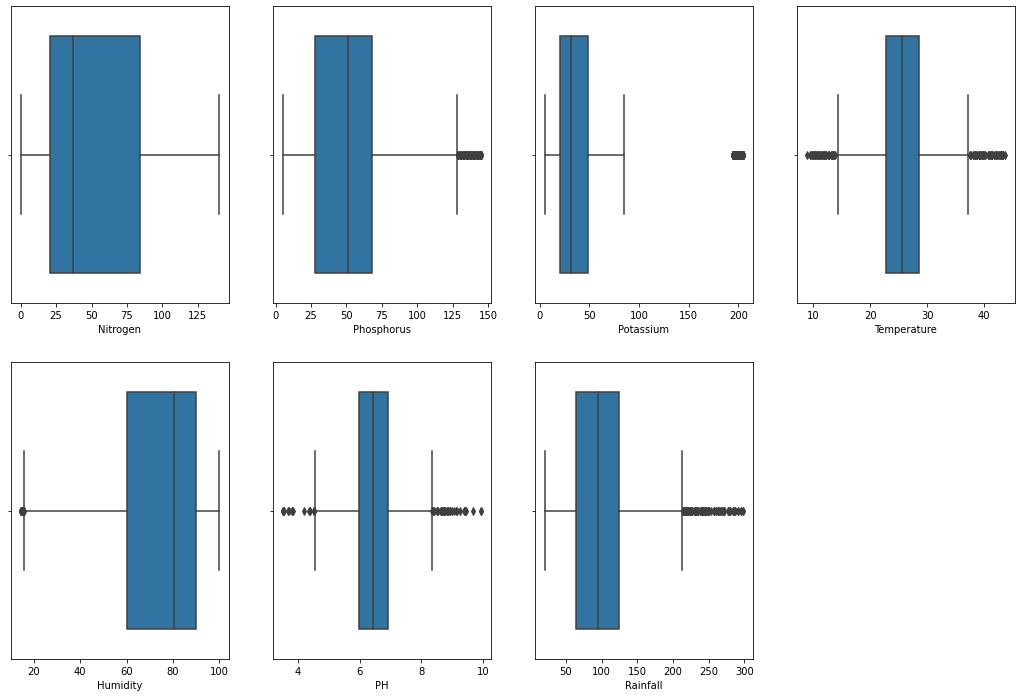

In [ ]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

plt.subplot(2,4,1)
sns.boxplot(data['N'])
plt.xlabel('Nitrogen')

plt.subplot(2,4,2)
sns.boxplot(data['P'])
plt.xlabel('Phosphorus')

plt.subplot(2,4,3)
sns.boxplot(data['K'])
plt.xlabel('Potassium')

plt.subplot(2,4,4)
sns.boxplot(data['temperature'])
plt.xlabel('Temperature')

plt.subplot(2,4,5)
sns.boxplot(data['humidity'])
plt.xlabel('Humidity')

plt.subplot(2,4,6)
sns.boxplot(data['ph'])
plt.xlabel('PH')

plt.subplot(2,4,7)
sns.boxplot(data['rainfall'])
plt.xlabel('Rainfall')

In [ ]:
c=data.label.astype('category')
targets = dict(enumerate(c.cat.categories))
data['target']=c.cat.codes

y=data.target
X=data[['N','P','K','temperature','humidity','ph','rainfall']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182